<a href="https://colab.research.google.com/github/khushiisainii/Complete-Python-3-Bootcamp/blob/master/marketing_ds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [29]:
from google.colab import drive
drive.mount ('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
cc_df = pd.read_csv('/content/Marketing_data.csv')

# New Section

# New Section

In [31]:
cc_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [32]:
cc_df[cc_df['ONEOFF_PURCHASES'] == 40761.25000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [33]:
cc_df['CASH_ADVANCE'].max()

47137.21176

<Axes: >

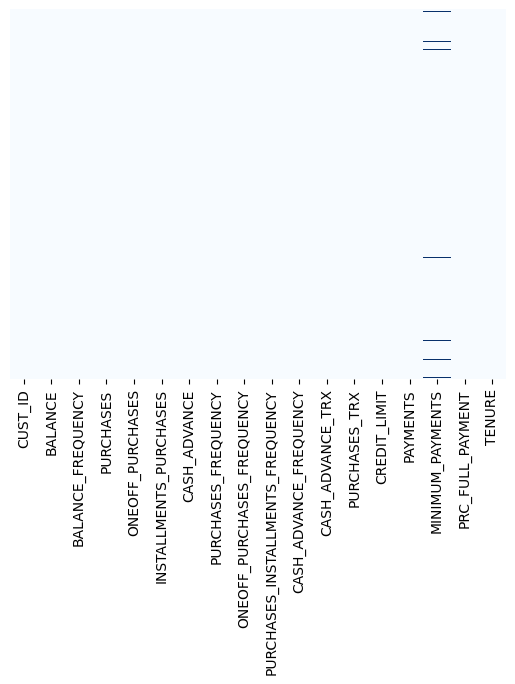

In [34]:
sns.heatmap(cc_df.isnull(), yticklabels = False , cbar = False, cmap = 'Blues')

In [35]:
cc_df.loc[(cc_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = cc_df['MINIMUM_PAYMENTS'].mean()

In [36]:
cc_df.drop('CUST_ID', axis = 1 , inplace = True)

In [37]:
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [38]:
plt.figure(figsize = (10, 50))
for i in range(len(cc_df.columns)):
  plt.subplot ( 17, 1, i+1)
  sns.distplot(cc_df(cc_df.columns[i])), kde_kws == {'colour' = 'b','lw':3},'label':'KDE', hist_kws = {'color' :'g'}
  plt.title (cc_df.columns = [i])
  plt.tight_layout()

SyntaxError: ignored

In [ ]:
correlations = cc_df.corr()

In [ ]:
sns.heatmap(correlations , annot = True)

In [ ]:
scaler = StandardScaler()
cc_df_scaled = scaler.fit_transform(cc_df)
cc_df_scaled.shape

In [ ]:
cc_df_scaled

In [ ]:
kmeans = KMeans(8)
kmeans.fit(cc_df_scaled)
labels = kmeans.labels_

In [ ]:
labels

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns = [cc_df.columns])

In [ ]:
cluster_centers

In [ ]:
cluster_centres

In [ ]:
scores_1 = []

range_values = range(1,20)


for i in range_values:
  kmeans = KMeans (n_clusters = i)
  kmeans.fit(cc_df_scaled)
  scores_1.append(kmeans.inertia_)


In [ ]:
plt.plot(scores_1, 'bx-')
plt.title
plt.xlable('clusters')


In [ ]:
plt.ylables ('scores WCSS')
plt.show

In [ ]:
labels.shape

In [ ]:
labels.max()

In [ ]:
labels.min()

In [ ]:
cc_df

In [ ]:
cc_df_cluster = pd.concat([cc_df , pd.DataFrame({'Cluster'})])

In [ ]:
for i in cc_df.columns:
  plt.figure(figsize = (35,5))
  for j in range (8):
    plt.subplot(1,8, j +1)
    cluster = cc_df_cluster[cc_df_cluster['cluster']]  == j ]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster{} . format (i,j)')

  plt.show